In [2]:
import numpy as np
import pandas as pd
import copy

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

Не забудьте скачать [данные](https://1drv.ms/u/c/a320c9b39dd5bde2/EZXNB1leZnRFpsAYSpmz0_cBlmmT4FbiKxcwov1ehM5d6Q): в директории `./data/` должны находиться файлы `users.csv`, `appeals.csv`, `navigation.csv`

In [3]:
appeals_init = pd.read_csv("./data/appeals.csv", index_col=0)
navigation_init = pd.read_csv("./data/navigation.csv", index_col=0, header=0, names=["user_id", "dt"])

In [4]:
appeals = appeals_init.copy()
navigation = navigation_init.copy()

In [5]:
appeals = appeals.dropna()
appeals["user_id"] = appeals["user_id"].astype("int64")
appeals["created_time"] = pd.to_datetime(appeals["created_time"])
appeals["rate"] = appeals["rate"].map({"Очень плохо": 1, "Плохо": 2, "Нормально": 3, "Хорошо": 4, "Отлично": 5})
appeals["type_closed"] = appeals["type_closed"].map({"Закрыто на Чат-Боте": 0, "Закрыто на агенте": 1})
appeals.head()

,question_id,user_id_native,user_id,created_time,rate,ready_recommend,type_closed
3989,176369,1.034575e+09,9311172462,2025-01-05,4,7,1
3990,74861,1.034575e+09,9311172462,2025-03-11,4,10,0
3991,176493,1.034570e+09,9311130045,2024-12-18,4,9,1
3992,74860,1.034570e+09,9311130045,2025-03-11,4,4,0
3993,176913,1.034567e+09,9311099904,2024-12-07,4,5,1


In [6]:
navigation["dt"] = pd.to_datetime(navigation["dt"])
navigation.head()

,user_id,dt
0,1485848484,2024-07-10
1,1485848484,2024-05-22
2,1485848484,2024-07-24
3,1485848484,2024-05-07
4,1485848484,2024-06-28


Распределение обращений по времени

In [7]:
# time_of_day - время создания обращения в формате "HH:MM"
appeals['time_of_day'] = appeals['created_time'].dt.strftime('%H:%M')

In [8]:
# Сгруппируем по времени создания заявки
appeals_by_time = appeals.groupby('time_of_day')['question_id'].count().reset_index()
appeals_by_time.columns = ['time', 'appeals_count']

In [9]:
# Сортировка по времени
appeals_by_time = appeals_by_time.sort_values('time')

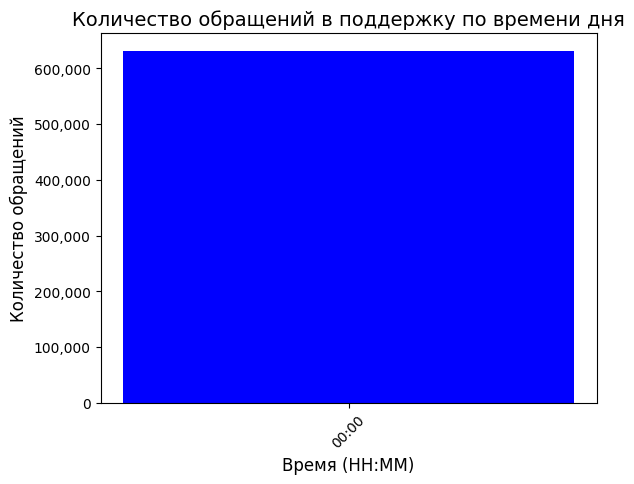

In [10]:
ax = plt.subplot(1, 1, 1)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.bar(appeals_by_time['time'], appeals_by_time['appeals_count'], color='blue')
ax.set_title('Количество обращений в поддержку по времени дня', fontsize=14)
ax.set_xlabel('Время (HH:MM)', fontsize=12)
ax.set_ylabel('Количество обращений', fontsize=12)
ax.tick_params(axis='x', rotation=45)

Такое распределение свидетельствует о том, что нам неизвестно точное время создания заявок (известна лишь дата)

Распределение навигации по времени дня

In [11]:
# time_of_day - время попадания в навигацию в формате "HH:MM"
navigation['time_of_day'] = navigation['dt'].dt.strftime('%H:%M')

In [12]:
# Сгруппируем по времени попадания в навигацию
navigation_by_time = navigation.groupby('time_of_day')['user_id'].count().reset_index()
navigation_by_time.columns = ['time', 'navigation_count']

In [13]:
# Количество уникальных пользователей, которые попадали в навигацию в это конкретное время
navigation_users_by_time = navigation.groupby('time_of_day')['user_id'].nunique().reset_index()
navigation_users_by_time.columns = ['time', 'unique_users']

In [14]:
# Сортировка по времени
navigation_by_time = navigation_by_time.sort_values('time')
navigation_users_by_time = navigation_users_by_time.sort_values('time')

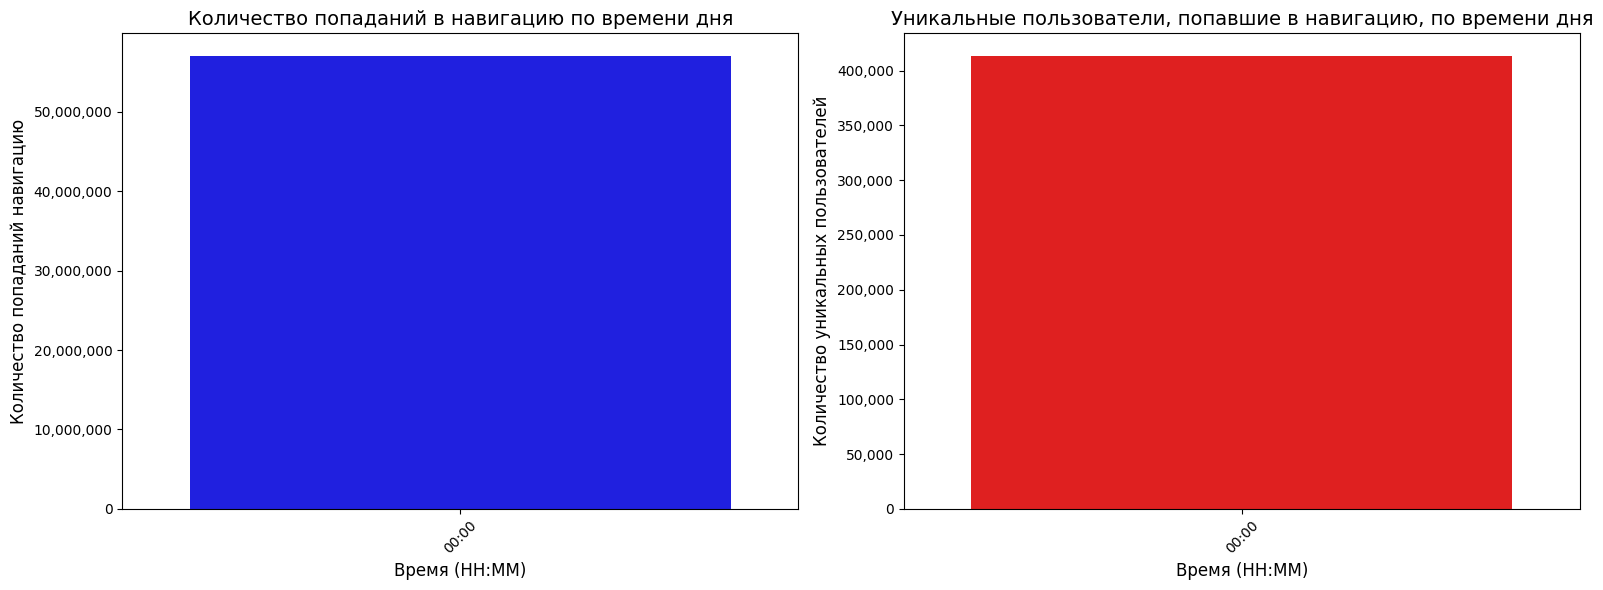

In [15]:
plt.figure(figsize=(16, 6))

# График количества попаданий в навигацию
ax1 = plt.subplot(1, 2, 1)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
sns.barplot(data=navigation_by_time, x='time', y='navigation_count', color='blue')
ax1.set_title('Количество попаданий в навигацию по времени дня', fontsize=14)
ax1.set_xlabel('Время (HH:MM)', fontsize=12)
ax1.set_ylabel('Количество попаданий навигацию', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# График уникальных пользователей
ax2 = plt.subplot(1, 2, 2)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
sns.barplot(data=navigation_users_by_time, x='time', y='unique_users', color='red')
ax2.set_title('Уникальные пользователи, попавшие в навигацию, по времени дня', fontsize=14)
ax2.set_xlabel('Время (HH:MM)', fontsize=12)
ax2.set_ylabel('Количество уникальных пользователей', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

Такое распределение свидетельствует о том, что нам неизвестно точное время попадания в навигацию (известна лишь дата)

In [16]:
users = pd.read_csv("./data/users.csv")

In [17]:
users['user_id'] = users['user_id'].astype('int64')
users['registration_dt'] = pd.to_datetime(users['registration_dt'])

In [18]:
# time_of_day - время создания обращения в формате "HH:MM"
users['time_of_day'] = users['registration_dt'].dt.strftime('%H:%M')

In [19]:
# Сгруппируем по времени создания заявки
users_by_time = users.groupby('time_of_day')['user_id'].count().reset_index()
users_by_time.columns = ['time', 'users_count']

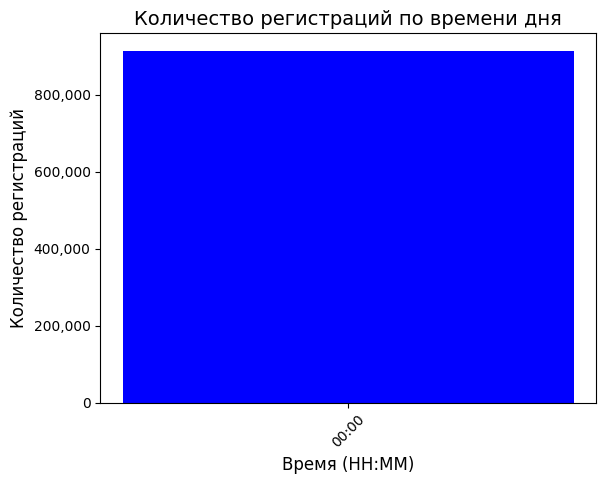

In [21]:
ax = plt.subplot(1, 1, 1)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.bar(users_by_time['time'], users_by_time['users_count'], color='blue')
ax.set_title('Количество регистраций по времени дня', fontsize=14)
ax.set_xlabel('Время (HH:MM)', fontsize=12)
ax.set_ylabel('Количество регистраций', fontsize=12)
ax.tick_params(axis='x', rotation=45)

Такое распределение свидетельствует о том, что нам неизвестно точное время регистрации (известна лишь дата)